Total number of images: 427
Number of features: 10
Number of 0: 142
Number of 1: 63
Number of 2: 34
Number of 4: 14
Number of 5: 174


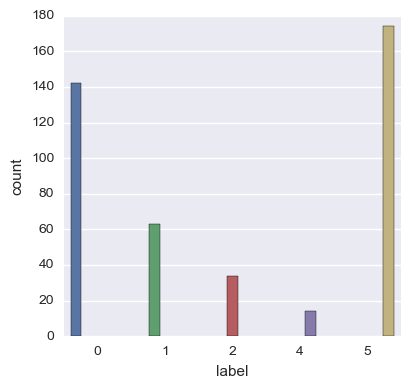

In [6]:
import seaborn as sns
import pandas as pd      
        
files = ["g1.csv", "g2.csv", "g3.csv", "g4.csv", "g5.csv", "g6.csv"]       
data = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
       
n_images = len(data)
n_features = len(data.columns[:-1])
n_good = len(data.loc[data['label'] == 0])
n_not_bad = len(data.loc[data['label'] == 1])
n_with_snow = len(data.loc[data['label'] == 2])
n_snow_and_clouds = len(data.loc[data['label'] == 4])
n_bad = len(data.loc[data['label'] == 5])

    # Print the results
print "Total number of images: {}".format(n_images)
print "Number of features: {}".format(n_features)
print "Number of 0: {}".format(n_good)
print "Number of 1: {}".format(n_not_bad)
print "Number of 2: {}".format(n_with_snow)
print "Number of 4: {}".format(n_snow_and_clouds)
print "Number of 5: {}".format(n_bad)

%matplotlib inline
sns.factorplot(x='label', data=data, hue='label', kind='count')

In [4]:
from time import time
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

In [13]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import AdaBoostClassifier

X_all = data.copy()
X_all.drop(['name', 'label'], axis=1, inplace=True)

y_all = data[['label']]

num_train = 300



# Set the number of testing points
num_test = data.shape[0] - num_train

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=0)


clf_A = svm.SVC(random_state=0)
clf_B = tree.DecisionTreeClassifier(random_state=0)
clf_C = RandomForestClassifier(random_state=0)
clf_D = ExtraTreesClassifier(random_state=0)
# clf_C = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
# clf_D = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf_E = AdaBoostClassifier(random_state=0)

for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
    for size in [300]:
        train_predict(clf, X_train[:size], y_train[:size], X_test, y_test)

Training a SVC using a training set size of 300. . .
Trained model in 0.0034 seconds
Made predictions in 0.0015 seconds.
F1 score for training set: 0.8097.
Made predictions in 0.0007 seconds.
F1 score for test set: 0.8357.
Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0014 seconds
Made predictions in 0.0001 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0001 seconds.
F1 score for test set: 0.9170.
Training a RandomForestClassifier using a training set size of 300. . .
Trained model in 0.0280 seconds
Made predictions in 0.0012 seconds.
F1 score for training set: 0.9866.
Made predictions in 0.0008 seconds.
F1 score for test set: 0.8798.
Training a ExtraTreesClassifier using a training set size of 300. . .
Trained model in 0.0209 seconds
Made predictions in 0.0011 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0008 seconds.
F1 score for test set: 0.8855.
Training a AdaBoostClassifier using a training set si

/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or